In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
"1. Data exploration"

# loading the data
data_bike = pd.read_csv("D:\e\SEM-2\Supervised Learning\Bicycle_Thefts.csv")

data_bike.nunique()
data_bike.info()
data_bike.Status.value_counts()
data_bike.isnull().sum()

desc = data_bike.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25569 entries, 0 to 25568
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X                      25569 non-null  float64
 1   Y                      25569 non-null  float64
 2   OBJECTID               25569 non-null  int64  
 3   event_unique_id        25569 non-null  object 
 4   Primary_Offence        25569 non-null  object 
 5   Occurrence_Date        25569 non-null  object 
 6   Occurrence_Year        25569 non-null  int64  
 7   Occurrence_Month       25569 non-null  object 
 8   Occurrence_DayOfWeek   25569 non-null  object 
 9   Occurrence_DayOfMonth  25569 non-null  int64  
 10  Occurrence_DayOfYear   25569 non-null  int64  
 11  Occurrence_Hour        25569 non-null  int64  
 12  Report_Date            25569 non-null  object 
 13  Report_Year            25569 non-null  int64  
 14  Report_Month           25569 non-null  object 
 15  Re

In [7]:

#We can see that, OBJECTID has almost all unique values and these values are ID. 
#ObjectID2 has 1 to 25569 numbers. Hence it acts like index
#Hence both columns will not create any pattern that help us to predict. Hence we can drop these both columns


In [8]:
data_bike.drop(['OBJECTID','ObjectId2'], axis=1, inplace= True)

<AxesSubplot:xlabel='Y', ylabel='Latitude'>

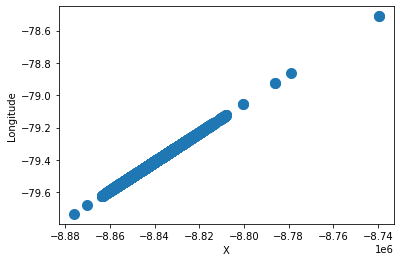

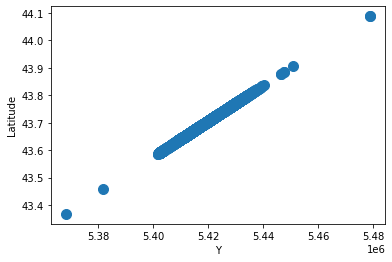

In [9]:

#----Scatter plot for Longitude and Latitude--#
data_bike.plot.scatter(x= 'X', y= 'Longitude',s = 100)
data_bike.plot.scatter(x= 'Y', y= 'Latitude',s = 100)

In [10]:
#Above both graph is creating straight line. That means column X and Longitude as well as
#column Y and Latitude has very strong correlation and seems that both are somewhat same 
#and act as duplicate. Hence we can drop one of them

In [11]:
data_bike.drop(['Longitude','Latitude'], axis=1, inplace= True)

In [12]:
#----City Column-----------#

city_counts = data_bike['City'].value_counts()
print(city_counts)


Toronto    25560
NSA            9
Name: City, dtype: int64


In [13]:
#City column has almost all value as 'Toronto' and only 9 value as NSA[Not Specified Area]
#In other words UNKNOWN. Hence with only one value, this column will not help to train model
#SO we can drop this column too

In [14]:
data_bike.drop('City', axis=1, inplace =True)

In [15]:
#----Hood_Id and NeighbourhoodName columns------#
print(data_bike['Hood_ID'].nunique())
print(data_bike['NeighbourhoodName'].nunique())

hood_id = data_bike['Hood_ID'].value_counts()
hood_name  =data_bike['NeighbourhoodName'].value_counts()

144
141


In [16]:
#From above code, we can infer that both columns are same and hence we can 
#drop one column


In [17]:
data_bike.drop('NeighbourhoodName', axis = 1, inplace =True)


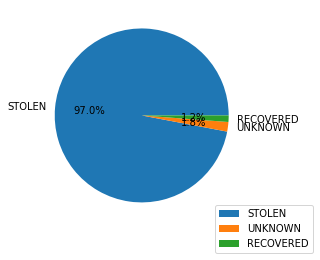

In [18]:
#-----Checking status column - Traget column
size = data_bike['Status'].value_counts()

plt.pie(size, labels = size.keys(), autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(0.01, 0.01, 1.3, .102))
plt.show()

In [19]:
#Above pie chart shows very imbalance dataset

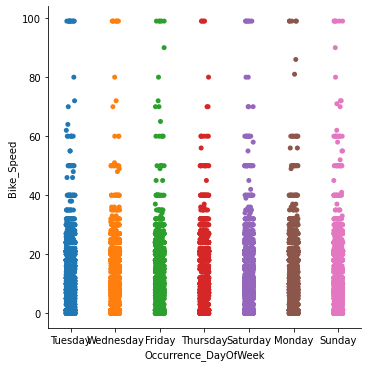

In [20]:
sns.catplot(x="Occurrence_DayOfWeek", y="Bike_Speed", data=data_bike)

<AxesSubplot:xlabel='Occurrence_DayOfWeek', ylabel='count'>

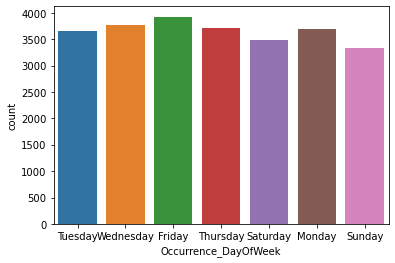

In [21]:

sns.countplot(x ='Occurrence_DayOfWeek', data = data_bike)


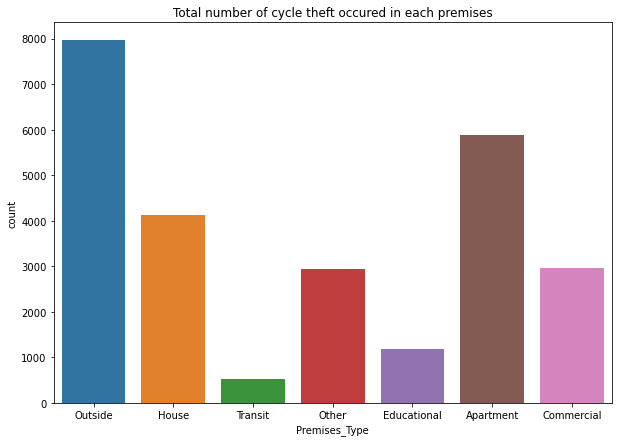

In [22]:
plt.figure(figsize = (10,7))
sns.countplot(x ='Premises_Type', data = data_bike)
plt.title('Total number of cycle theft occured in each premises')
plt.show()

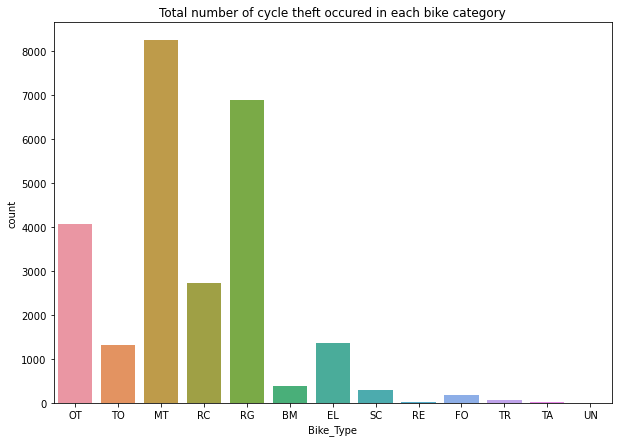

In [23]:
plt.figure(figsize = (10,7))
sns.countplot(x ='Bike_Type', data = data_bike)
plt.title('Total number of cycle theft occured in each bike category')
plt.show()

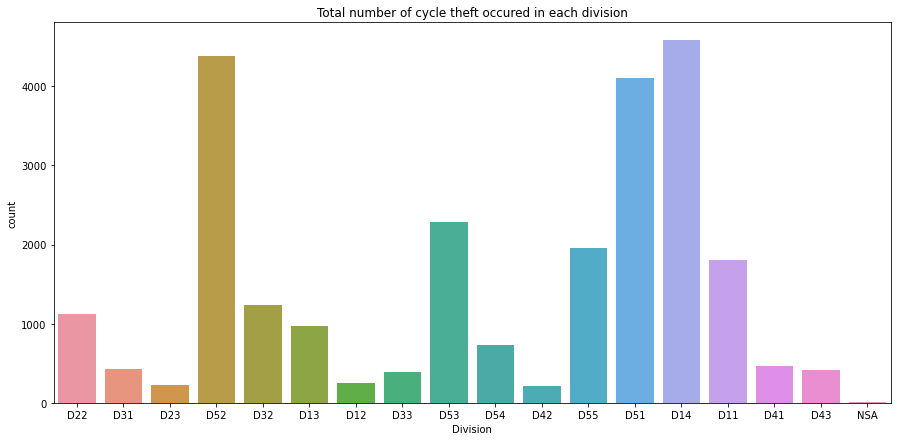

In [24]:
plt.figure(figsize = (15,7))
sns.countplot(x ='Division', data = data_bike)
plt.title('Total number of cycle theft occured in each division')
plt.show()


<AxesSubplot:xlabel='Premises_Type'>

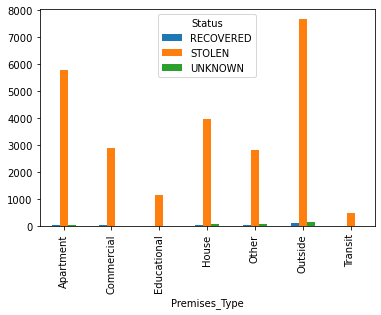

In [25]:
pd.crosstab(data_bike['Premises_Type'],data_bike['Status']).plot(kind="bar",stacked=False)

<Figure size 1080x720 with 0 Axes>

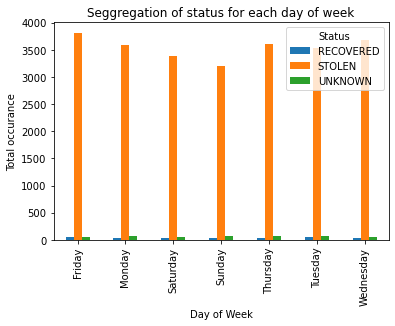

In [26]:

plt.figure(figsize = (15,10))
pd.crosstab(data_bike['Occurrence_DayOfWeek'],data_bike['Status']).plot(kind="bar",stacked=False)
plt.title('Seggregation of status for each day of week')
plt.xlabel('Day of Week')
plt.ylabel('Total occurance')
plt.show()

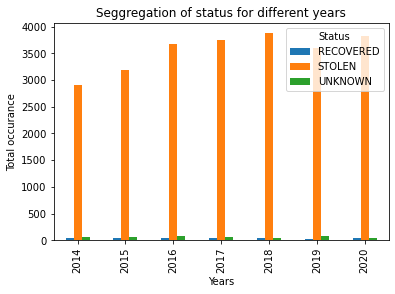

In [27]:
data = data_bike[['Report_Year','Status']]
report_yr = data.groupby(["Status","Report_Year"])[["Report_Year"]].count().rename(columns={"Report_Year":"count"})
pd.crosstab(data_bike['Report_Year'],data_bike['Status']).plot(kind="bar",stacked=False)
plt.title('Seggregation of status for different years')
plt.xlabel('Years')
plt.ylabel('Total occurance')
plt.show()


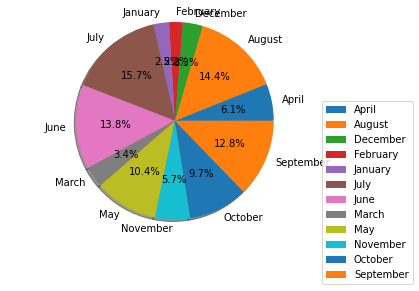

In [28]:
#Occurance Month
labels = data_bike['Occurrence_Month'].astype('category').cat.categories.tolist()
counts = data_bike['Occurrence_Month'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.legend(bbox_to_anchor=(0.026, 0.015, 1.2, .60))
plt.show()

In [29]:
#-----Transformed target column to binary numeric---#
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

lb = lb.fit_transform(data_bike['Status'])

data_bike['Status_new'] = lb[:,0]

data_bike.drop('Status', axis = 1, inplace =True)

In [30]:
#------Handle missing values of Categorical alphabetic columns----#

data_bike['Bike_Make'].fillna(data_bike['Bike_Make'].value_counts().index[0], inplace = True)
data_bike['Bike_Colour'].fillna(data_bike['Bike_Colour'].value_counts().index[0], inplace = True)
data_bike['Bike_Model'].fillna(data_bike['Bike_Model'].value_counts().index[0], inplace = True)

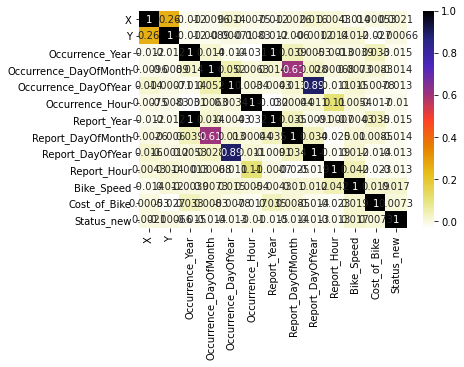

In [31]:
#--------Finding correlation-----------------#

data_num = data_bike.select_dtypes(include  ='number')

cor = data_num.corr()
cor['Status_new'].sort_values(ascending = False)
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [32]:
#Calling above function will give us column names that has high correlation
#With other column and hence it can be removed because it might act as duplicate.


In [33]:
corr_features = correlation(data_num, 0.85)

data_bike.drop(list(corr_features),axis=1, inplace =True)

data_cat = data_bike.select_dtypes(exclude = 'number')


In [34]:
from sklearn.preprocessing import OrdinalEncoder

label = OrdinalEncoder()
data_c =label.fit_transform(data_cat.astype(str))

data_catego = pd.DataFrame(data_c, columns=data_cat.columns,
                          index=data_cat.index)

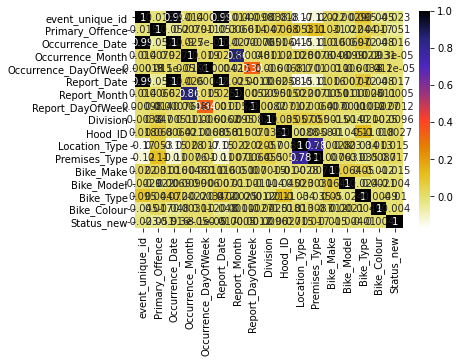

In [35]:
temp =pd.concat([data_catego,data_bike['Status_new']], axis =1)

cor_cat = temp.corr()
sns.heatmap(cor_cat, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [36]:
corr_features = correlation(cor_cat, 0.85)

data_bike.drop(['Report_Month','Occurrence_Date','Report_Date'],axis= 1, inplace= True)



In [37]:
#------imbalanced data handling-------#
#separate majority and minorty classes

from sklearn.utils import resample
data_majority = data_bike[data_bike.Status_new==0]
data_minority = data_bike[data_bike.Status_new==1]


In [38]:
#Upsample minority class
df_minority_upsample = resample(data_minority, replace =  True, n_samples = 25261, random_state = 10)


In [39]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([data_majority, df_minority_upsample])


In [40]:
# Display new class counts
df_upsampled.Status_new.value_counts()

0    25261
1    25261
Name: Status_new, dtype: int64

In [41]:
data_bike = df_upsampled.copy()

In [42]:
#------------------------------------
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer


In [43]:
X = data_bike.drop('Status_new', axis=1)
Y= data_bike['Status_new']


In [44]:
#X_train,X_test,y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


In [45]:

data_num = X.select_dtypes(include  ='number')
data_cat = X.select_dtypes(exclude = 'number')


num_pipeline = Pipeline([
        ('imputer', IterativeImputer(max_iter=100)),
        ('std_scaler', StandardScaler()),
    ])
         
data_num_tr = num_pipeline.fit_transform(data_num)

In [46]:

num_attribs = list(data_num)
cat_attribs = list(data_cat)


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        
    ])

data_tr = full_pipeline.fit_transform(X.astype(str))


X_train,X_test,y_train, y_test = train_test_split(data_tr,Y, test_size=0.2, random_state=42)


In [47]:
#------Handling imbalanced data with Oversampling(upsampling)----#
from imblearn.over_sampling import SMOTE
smote=SMOTE("minority")
X_train_res, y_train_res = smote.fit_resample(X_train,y_train)


from collections import Counter
print(f'Original dataset shape {Counter(y_train)}')
print(f'Resampled dataset shape {Counter(y_train_res)}')


C:\Users\Devanshi\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


Original dataset shape Counter({0: 20224, 1: 20193})
Resampled dataset shape Counter({0: 20224, 1: 20224})


In [48]:

#---------Data Modeling------------#
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,precision_score, recall_score


clf_lg = LogisticRegression(solver='sag', max_iter=2000)
clf_svm = SVC(kernel ='linear', C = 0.1)
clf_dt = DecisionTreeClassifier()
clf_rf = RandomForestClassifier()
clf_ext = ExtraTreesClassifier()

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


C:\Users\Devanshi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Devanshi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Devanshi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Devanshi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Best Score: 0.9946062998175229
Logistic Regression Precision: 0.9921691464369616
Logistic Regression Recall: 1.0
Logistic Regression Accuracy: 0.9960415635823849


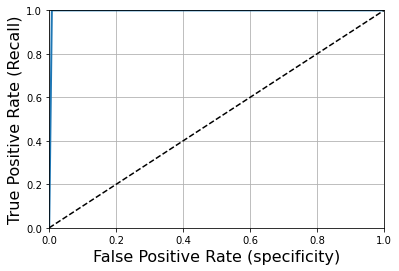

In [49]:
#-------------------Logistic Regression----------------#
clf_lg.fit(X_train, y_train)

clf_lg.score(X_train, y_train)
y_pred_lg = clf_lg.predict(X_test)

confusion_matrix(y_test, y_pred_lg)
accuracy_score(y_test, y_pred_lg)
precision_score(y_test, y_pred_lg)
recall_score(y_test, y_pred_lg)

param_random_lg = [{'penalty' : ['l2'], 'C': [0.1, 0.3, 1, 1.5],
                        'solver':['lbfgs','sag','saga']}]

rnd_search_lg = GridSearchCV(clf_lg, param_random_lg,
                                 cv=5, scoring='accuracy')

rnd_search_lg.fit(X_train, y_train)
rnd_search_lg.score(X_train,y_train)
print(f'Best Score: {rnd_search_lg.best_score_}' )
rnd_search_lg.best_params_
y_pred_lg = rnd_search_lg.predict(X_test)
confusion_matrix(y_test, y_pred_lg)
print(f'Logistic Regression Precision: {precision_score(y_test, y_pred_lg)}')
print(f'Logistic Regression Recall: {recall_score(y_test, y_pred_lg)}')
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lg)}')


from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lg)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (specificity)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)        

plot_roc_curve(fpr, tpr)
plt.show()

Best Hyperparameters:{'min_samples_split': 70, 'min_samples_leaf': 4, 'max_depth': 295}
Best Score: 0.9835465243301146
DecisionTree Precision: 0.9749903809157369
DecisionTree Recall: 1.0
DecisionTree Accuracy: 0.9871350816427511


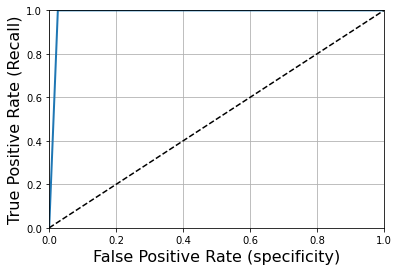

In [50]:
#----------------Decision Tree------------------#

param_grid_dt = {'min_samples_split' : range(10,300,20),
                        'max_depth': range(1,1000,2),
                        'min_samples_leaf':range(1,150,3)}

rnd_search_dt = RandomizedSearchCV(clf_dt, param_distributions=param_grid_dt,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)

rnd_search_dt.fit(X_train, y_train)
y_pred_dt = rnd_search_dt.predict(X_test)
confusion_matrix(y_test, y_pred_dt)
rnd_search_dt.score(X_train, y_train)

print(f'Best Hyperparameters:{rnd_search_dt.best_params_}' )
print(f'Best Score: {rnd_search_dt.best_score_}' )
print(f'DecisionTree Precision: {precision_score(y_test, y_pred_dt)}')
print(f'DecisionTree Recall: {recall_score(y_test, y_pred_dt)}')
print(f'DecisionTree Accuracy: {accuracy_score(y_test, y_pred_dt)}')

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (specificity)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)        

plot_roc_curve(fpr, tpr)
plt.show()

Best Hyperparameters:{'n_estimators': 30, 'max_depth': 17}
Best Score: 0.9016256928136052
Random Forest Precision: 0.946358482337549
Random Forest Recall: 0.856353591160221
Random Forest Accuracy: 0.9036120732310737


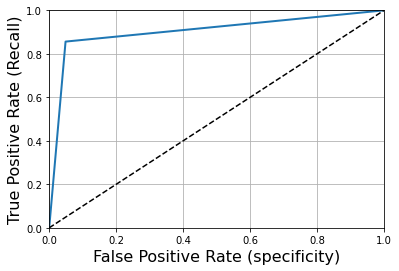

In [52]:
#---------------Random Forest---------------------#

param_random_rf = [
    {'n_estimators': list(range(10,70,20)), 
     'max_depth': list(range(1,20,4))}
    ]

rnd_search_rf = RandomizedSearchCV(clf_rf, param_distributions=param_random_rf,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search_rf.fit(X_train, y_train)
print(f'Best Hyperparameters:{rnd_search_rf.best_params_}' )
print(f'Best Score: {rnd_search_rf.best_score_}' )
rnd_search_rf.score(X_train, y_train)


y_pred_rf = rnd_search_rf.predict(X_test)

confusion_matrix(y_test, y_pred_rf)
print(f'Random Forest Precision: {precision_score(y_test, y_pred_rf)}')
print(f'Random Forest Recall: {recall_score(y_test, y_pred_rf)}')
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}')

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (specificity)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)        

plot_roc_curve(fpr, tpr)
plt.show()



In [53]:


"""#Grid Search

param_grid_rf = [
    {'n_estimators': list(range(10,200,20)),  
     'max_depth': list(range(10,30,4))}
    ]


grid_search_rf = GridSearchCV(clf_rf, param_grid_rf, scoring = 'accuracy', 
                                refit = True
                            ,verbose =3)

grid_search_rf.fit(X_train, y_train)

y_pred_rf = grid_search_rf.predict(X_test)

confusion_matrix(y_test, y_pred_rf)"""



"#Grid Search\n\nparam_grid_rf = [\n    {'n_estimators': list(range(10,200,20)),  \n     'max_depth': list(range(10,30,4))}\n    ]\n\n\ngrid_search_rf = GridSearchCV(clf_rf, param_grid_rf, scoring = 'accuracy', \n                                refit = True\n                            ,verbose =3)\n\ngrid_search_rf.fit(X_train, y_train)\n\ny_pred_rf = grid_search_rf.predict(X_test)\n\nconfusion_matrix(y_test, y_pred_rf)"

Best Hyperparameters:{'n_estimators': 50, 'max_depth': 17}
Best Score: 0.9062279322097563
Extra Tree Precision: 0.9990143899073527
Extra Tree Recall: 1.0
Extra Tree Accuracy: 0.9995051954477981


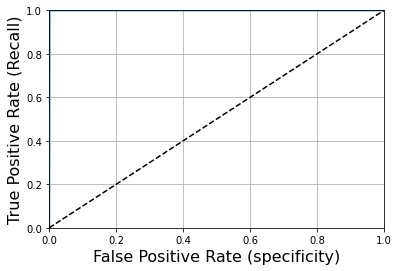

In [54]:
#----------------Extra Tree-----------------------------#


param_random_ext = [
    {'n_estimators': list(range(10,70,20)), 
     'max_depth': list(range(1,20,4))}
    ]

rnd_search_ext = RandomizedSearchCV(clf_ext, param_distributions=param_random_ext,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search_ext.fit(X_train, y_train)
print(f'Best Hyperparameters:{rnd_search_ext.best_params_}' )
print(f'Best Score: {rnd_search_ext.best_score_}' )

"""grid_search_ext = [
    {'n_estimators': list(range(10,200,20)),  
     'max_depth': list(range(10,30,4))}
    ]

y_pred_ext = grid_search_ext.predict(X_test)
confusion_matrix(y_test, y_pred_ext)

grid_search_ext.score(X_train, y_train)"""
clf_ext.fit(X_train,y_train)

clf_ext.score(X_train, y_train)

y_pred_ext = clf_ext.predict(X_test)
confusion_matrix(y_test, y_pred_ext)

print(f'Extra Tree Precision: {precision_score(y_test, y_pred_ext)}')
print(f'Extra Tree Recall: {recall_score(y_test, y_pred_ext)}')
print(f'Extra Tree Accuracy: {accuracy_score(y_test, y_pred_ext)}')


from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_ext)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (specificity)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)        

plot_roc_curve(fpr, tpr)
plt.show()

In [55]:
#--------------SVC-----------------------#
"""param_grid_svm = [
        {'kernel':['linear','poly'], 'C':[0.01,0.1,0.3, 1],
                        'gamma': [0.01, 0.1,0.3, 1.0],'degree':[2,3]} 
    ]

grid_search_svm = GridSearchCV(clf_svm, param_grid_svm, scoring = 'accuracy', 
                                refit = True
                            ,verbose =3)

grid_search_svm.fit(X_train_res, y_train_res)


rnd_search = RandomizedSearchCV(clf_svm, param_distributions=param_grid_svm,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X_train_res, y_train_res)
"""



"param_grid_svm = [\n        {'kernel':['linear','poly'], 'C':[0.01,0.1,0.3, 1],\n                        'gamma': [0.01, 0.1,0.3, 1.0],'degree':[2,3]} \n    ]\n\ngrid_search_svm = GridSearchCV(clf_svm, param_grid_svm, scoring = 'accuracy', \n                                refit = True\n                            ,verbose =3)\n\ngrid_search_svm.fit(X_train_res, y_train_res)\n\n\nrnd_search = RandomizedSearchCV(clf_svm, param_distributions=param_grid_svm,\n                                n_iter=10, cv=5, scoring='accuracy', random_state=42)\nrnd_search.fit(X_train_res, y_train_res)\n"

SVM Precision: 0.9956777996070727
SVM Recall: 1.0
SVM Accuracy: 0.9978228599703117


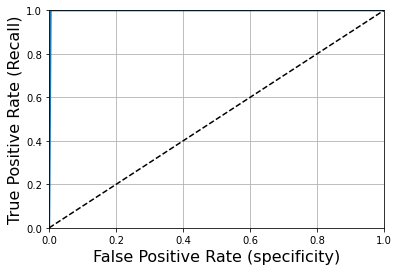

In [56]:
"""---- svm ---"""
clf_svm.fit(X_train, y_train)
clf_svm.score(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
confusion_matrix(y_test, y_pred_svm)


print(f'SVM Precision: {precision_score(y_test, y_pred_svm)}')
print(f'SVM Recall: {recall_score(y_test, y_pred_svm)}')
print(f'SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}')

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (specificity)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)        

plot_roc_curve(fpr, tpr)
plt.show()